In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sys
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
file_path = 'weatherAUS.csv'
Aus_weather = pd.read_csv(file_path)

Data Analysis

In [3]:
# Display basic information of the dataset
print(Aus_weather.info())

# Display the first few rows of the dataset
print(Aus_weather.head())

# Basic statistical summary of numerical features
print(Aus_weather.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [4]:
# Calculate the percentage of missing data in each column
missing_percentage = Aus_weather.isnull().sum() * 100 / len(Aus_weather)

# Display the percentage of missing data for each column
print(missing_percentage)

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64


In [5]:
#drop the column
Aus_weather = Aus_weather.drop(['Date'], axis=1)
categorical_data = Aus_weather.select_dtypes(include=['object'])
Aus_weather = Aus_weather.drop(categorical_data, axis=1)

numerical_data = Aus_weather.select_dtypes(include=[np.number])
# # Apply one-hot encoding
# encoded_data = pd.get_dummies(categorical_data)

# numerical_data=pd.concat([numerical_data, encoded_data], axis=1)

# Drop the columns with more than 30% missing data
numerical_data = numerical_data.dropna(thresh=len(Aus_weather)*0.7, axis=1)
# use imputer to fill the missing data

# Create an imputer object with a mean filling strategy
imputer = SimpleImputer(strategy='mean')

# Apply the imputer to our data
# imputer.fit_transform returns a numpy array, so we need to convert it back to a DataFrame
imputed_data = pd.DataFrame(imputer.fit_transform(numerical_data), columns=numerical_data.columns)

# Check the imputed data
print(imputed_data.head())

   MinTemp  MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  WindSpeed3pm   
0     13.4     22.9       0.6           44.0          20.0          24.0  \
1      7.4     25.1       0.0           44.0           4.0          22.0   
2     12.9     25.7       0.0           46.0          19.0          26.0   
3      9.2     28.0       0.0           24.0          11.0           9.0   
4     17.5     32.3       1.0           41.0           7.0          20.0   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Temp9am  Temp3pm  
0         71.0         22.0       1007.7       1007.1     16.9     21.8  
1         44.0         25.0       1010.6       1007.8     17.2     24.3  
2         38.0         30.0       1007.6       1008.7     21.0     23.2  
3         45.0         16.0       1017.6       1012.8     18.1     26.5  
4         82.0         33.0       1010.8       1006.0     17.8     29.7  


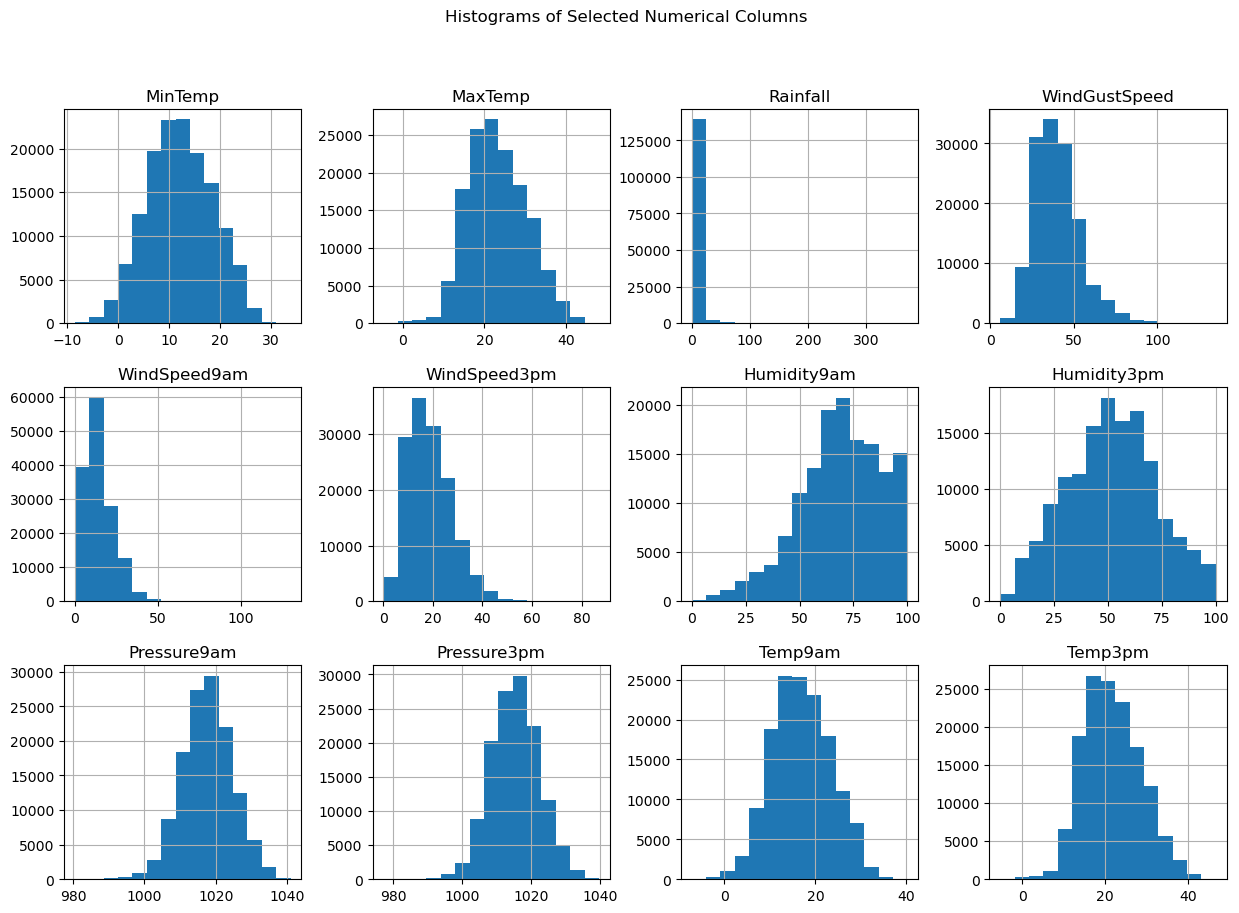

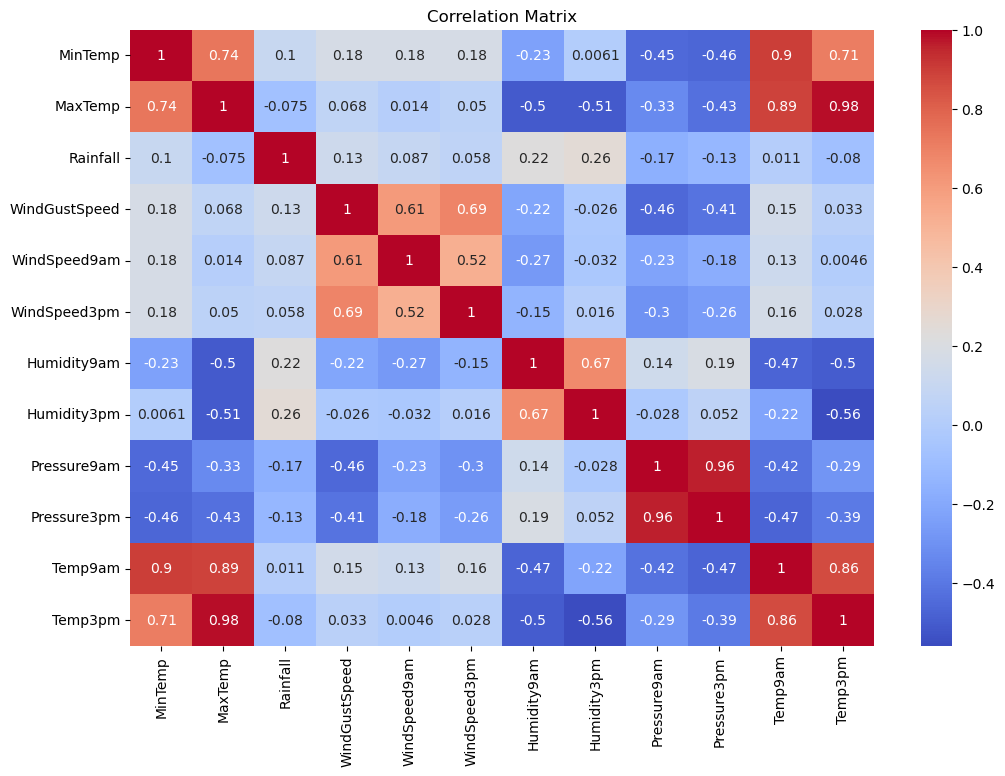

In [6]:

numerical_data.hist(bins=15, figsize=(15, 10), layout=(3, 4))
plt.suptitle('Histograms of Selected Numerical Columns')
plt.show()

# Generating a correlation matrix
correlation_matrix = numerical_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

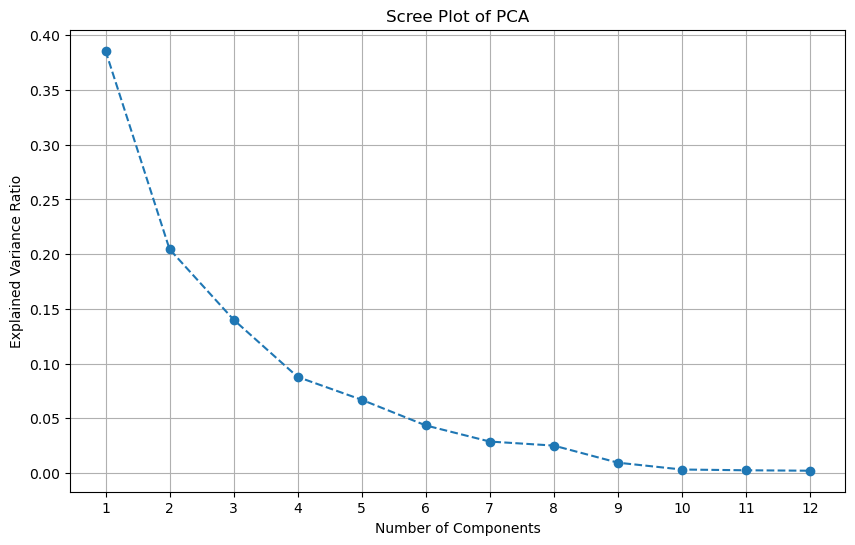

In [7]:
# Standardizing the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(imputed_data)

# Applying PCA
pca = PCA()  # Not specifying the number of components to compute all
pca.fit(scaled_data)

# Getting the explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Generating the scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Scree Plot of PCA')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance) + 1))
plt.grid(True)
plt.show()

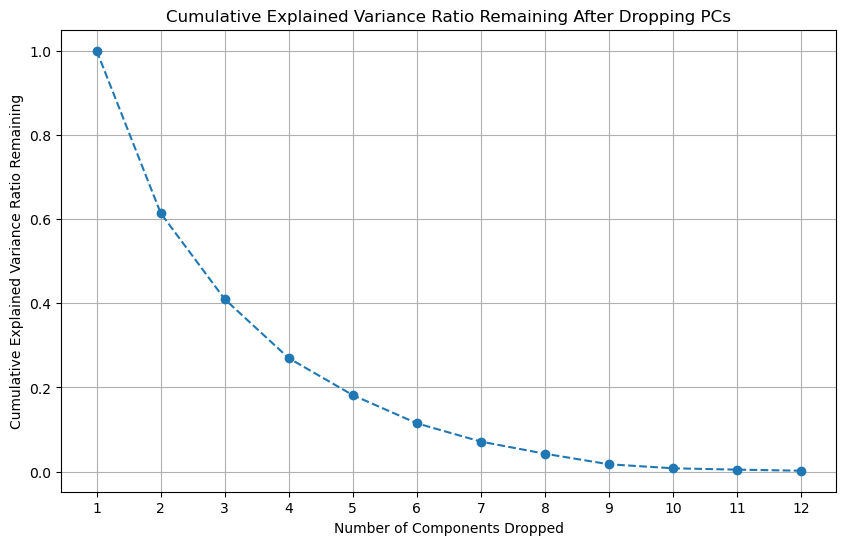

In [8]:
# Calculate the cumulative explained variance ratio in reverse
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_[::-1])[::-1]

# Generating the plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance Ratio Remaining After Dropping PCs')
plt.xlabel('Number of Components Dropped')
plt.ylabel('Cumulative Explained Variance Ratio Remaining')
plt.xticks(range(1, len(cumulative_variance_ratio) + 1))
plt.grid(True)
plt.show()

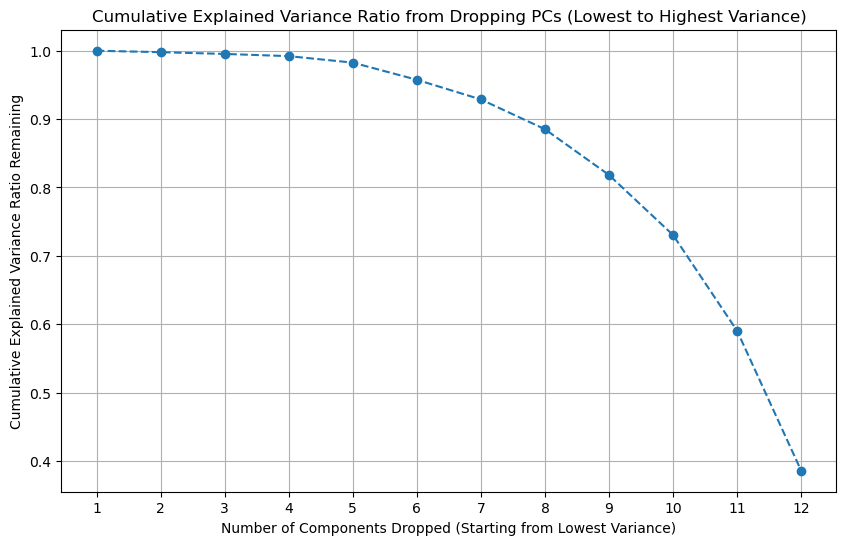

In [9]:
# Sort the explained variance ratios in ascending order
sorted_variance_ratios = np.sort(pca.explained_variance_ratio_)

# Calculate the cumulative explained variance ratio in reverse after sorting
cumulative_variance_ratio = np.cumsum(sorted_variance_ratios[::-1])[::-1]

# Generating the plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance Ratio from Dropping PCs (Lowest to Highest Variance)')
plt.xlabel('Number of Components Dropped (Starting from Lowest Variance)')
plt.ylabel('Cumulative Explained Variance Ratio Remaining')
plt.xticks(range(1, len(cumulative_variance_ratio) + 1))
plt.grid(True)
plt.show()